In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
df=pd.read_csv("canopy_cover_data_4_NF.csv")

In [75]:
df

,trueCover,estCover,normEdgeLength,penetrationRate,normCoreCells
0,13.7131,11.7782,0.0416,0.2197,0.0569
1,14.7214,10.1562,0.0741,0.3798,0.0098
2,47.7427,42.7722,0.1591,0.1789,0.2082
3,83.4849,54.6875,0.2919,0.4255,0.1716
4,34.3680,33.0871,0.0622,0.1268,0.2355
...,...,...,...,...,...
999995,34.3906,35.3937,0.0952,0.0545,0.2223
999996,24.7275,22.2368,0.0844,0.2090,0.1062
999997,5.0970,2.9562,0.0284,0.5357,0.0021
999998,17.7866,17.0525,0.0885,0.0818,0.0540


eval_env: 1


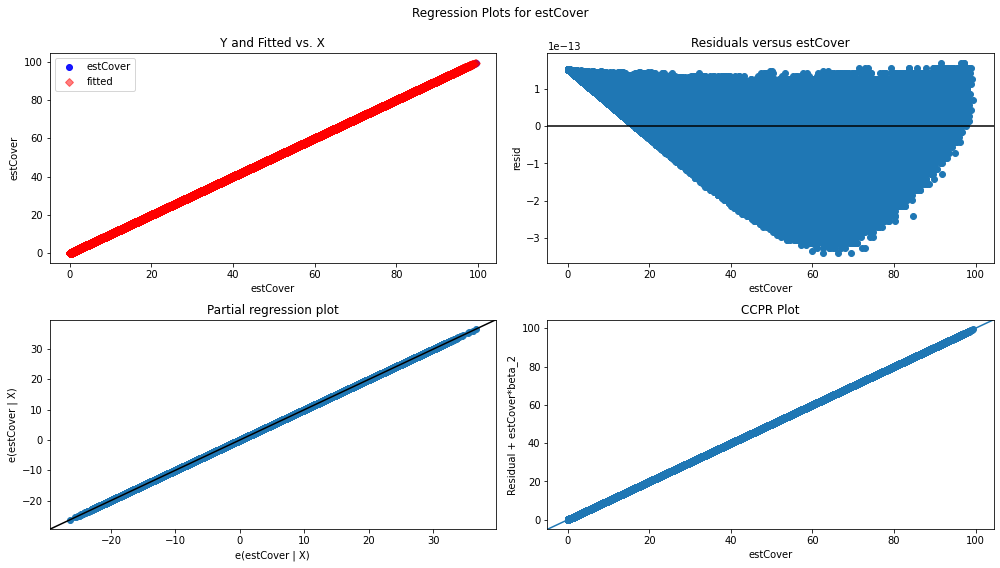

In [76]:
from statsmodels.formula.api import ols
multi_model = ols("estCover ~ normCoreCells + estCover", data=df).fit()
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(multi_model, 'estCover', fig=fig)

In [77]:
x=df[['estCover','normEdgeLength','penetrationRate','normCoreCells']]


In [78]:
x

,estCover,normEdgeLength,penetrationRate,normCoreCells
0,11.7782,0.0416,0.2197,0.0569
1,10.1562,0.0741,0.3798,0.0098
2,42.7722,0.1591,0.1789,0.2082
3,54.6875,0.2919,0.4255,0.1716
4,33.0871,0.0622,0.1268,0.2355
...,...,...,...,...
999995,35.3937,0.0952,0.0545,0.2223
999996,22.2368,0.0844,0.2090,0.1062
999997,2.9562,0.0284,0.5357,0.0021
999998,17.0525,0.0885,0.0818,0.0540


In [79]:
y=df[['trueCover']]


In [80]:
y

,trueCover
0,13.7131
1,14.7214
2,47.7427
3,83.4849
4,34.3680
...,...
999995,34.3906
999996,24.7275
999997,5.0970
999998,17.7866


In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_train,x_test, y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=0)

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:

Log_reg= LinearRegression()


In [85]:
Log_reg.fit(x_train,y_train)

LinearRegression()

In [86]:
y_pred=Log_reg.predict(x_test)

In [87]:
from sklearn.metrics import r2_score

In [88]:
from sklearn.metrics import mean_squared_error

In [89]:
score=r2_score(y_test,y_pred)


In [90]:
print("r2 socre is ",score)
print("mean_sqrd_error is==",mean_squared_error(y_test,y_pred))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,y_pred)))


r2 socre is  0.9715794735077907
mean_sqrd_error is== 18.529450502018808
root_mean_squared error of is== 4.304584823420118


In [91]:
#the accuracy score is greater than 0.8 it means we can use this model to solve multiple linear regression, 
#and also mean squared error rate is also low.

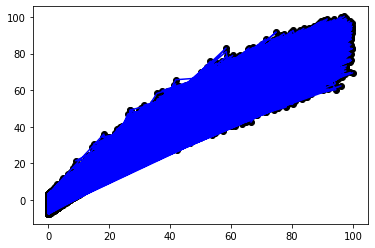

In [92]:
plt.scatter(y_test, y_pred, color="black")
plt.plot(y_test, y_pred, color="blue")
plt.show()

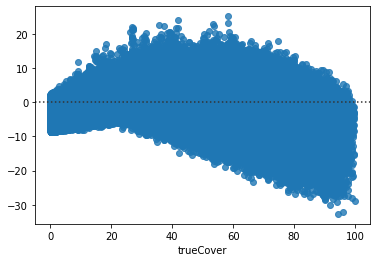

In [93]:
sns.residplot(x=y_test, y=y_pred)
  
plt.show()